In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"
import cv2

from os.path import join
import imageio.v2 as imageio


In [30]:
path2outs = "/home/alban/Documents/blender_testset/testset/"
#directory = 'images_eevee_patterns'
directory = 'images_floorpattern_eevee3p6'

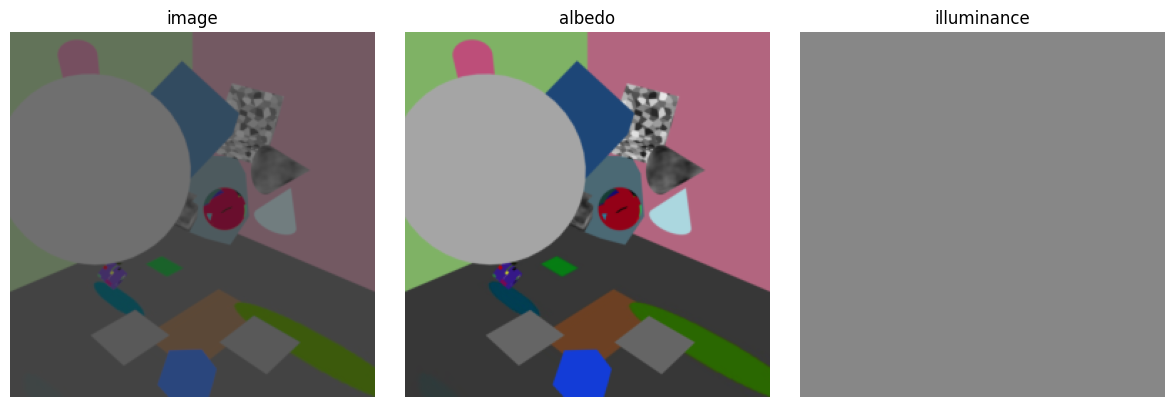

0.9121094

In [31]:
imgpath = join(path2outs, "%s/img_0.4_0.4_0.0.exr"%directory)
img = cv2.imread(imgpath, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
albedo = cv2.imread(join(path2outs, "%s/img_0.4_0.4_0.0_ref.exr"%directory), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
albedo = cv2.cvtColor(albedo, cv2.COLOR_BGR2RGB)
albedo[albedo<0.00001]= 0.00001
#albedo = np.load(join(path2outs, "albedo.npy"))
img_illuminance = (img)/albedo
fig, subs = plt.subplots(1,3, sharex=True, sharey=True, figsize=(12,4))

subs[0].imshow((img)**(1/2.2))
#subs[0].imshow(img)
subs[0].axis('off')
subs[0].set_title('image')
subs[1].imshow(albedo)
subs[1].axis('off')
subs[1].set_title('albedo')
#subs[2].imshow(img_illuminance**(1/2.2))
subs[2].imshow(img_illuminance**(1/2.2))
subs[2].set_title('illuminance')
subs[2].axis('off')
fig.tight_layout()
plt.show()

albedo.max()

In [32]:
## Load masks

def load_mask(path):
    tresh= 0.99
    mask = cv2.imread(path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH).mean(-1)
    #if path[-3:]=='png':
    mask = mask/mask.max()
    mask[mask>tresh]=1.0
    mask[mask<1] = 0
    maskblur = cv2.GaussianBlur(mask,(3,3),1)
    return mask

def expandmask(mask):
    maskexp=mask.copy()
    return maskexp

def reducemask(mask):
    maskred=mask.copy()
    
    return maskexp



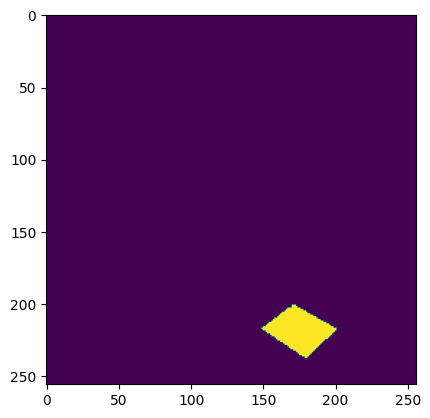

In [33]:
mask_rightsheet = load_mask(path2outs + 'masks_floorpattern/rightsheet_ref.exr')
mask_leftsheet = load_mask(path2outs + 'masks_floorpattern/leftsheet_ref.exr')
#mask_rightsheet = load_mask(path2outs + 'masks/rightsheet_ref.png')

#mask_rightsheet[mask_rightsheet<0.99]=0
plt.imshow(mask_rightsheet)

In [34]:
## find values for cube condition

illuminance_ratios = list()
illuminance_ratios2 = list()

for i in ["0.0", "0.35", "0.75", "1.5", "3.0"]:
    imgpath = join(path2outs, "%s/img_0.4_0.4_%s.exr"%(directory, i))
    #import pdb; pdb.set_trace()
    img = cv2.imread(imgpath, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #albedo = cv2.imread("outs/new_images/ref_274_ill_0_test_274_albedo.exr", cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    img_illuminance = img.mean(-1)/albedo.mean(-1)
    illuminance_left = img_illuminance[mask_leftsheet==1]
    illuminance_right = img_illuminance[mask_rightsheet==1]
    illuminance_ratios.append(np.mean(illuminance_right)/np.mean(illuminance_left))

print(illuminance_ratios)

img_test = img.copy()



[0.9999997, 1.4203221, 1.9006904, 2.8013816, 4.6027637]


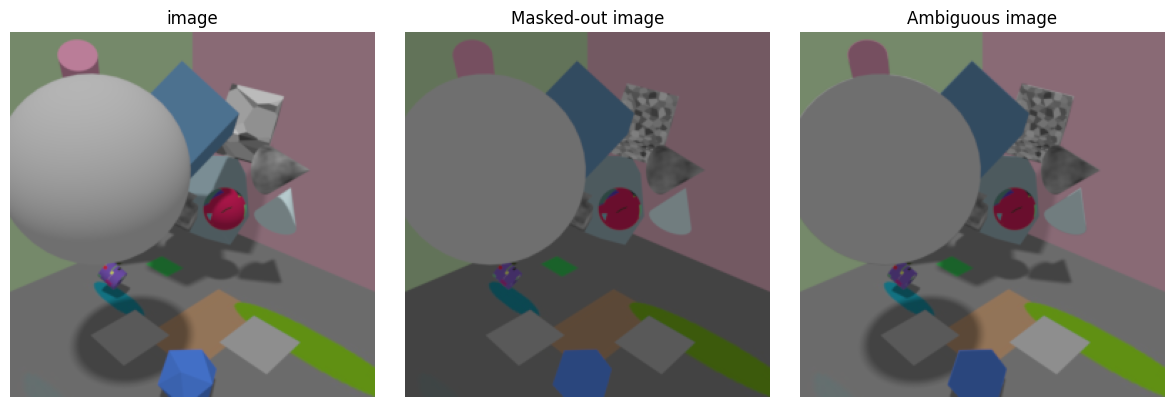

In [35]:
# create shading condition

imgpath = join(path2outs, "%s/img_0.4_0.4_1.5.exr"%directory)
img = cv2.imread(imgpath, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

imgpath0 = join(path2outs, "%s/img_0.4_0.4_0.0.exr"%directory)
img_0 = cv2.imread(imgpath0, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
img_0 = cv2.cvtColor(img_0, cv2.COLOR_BGR2RGB)
# masks of all different objects
#mask_allobj = load_mask(path2outs + 'masks_nov2_patterns/allobjects_ref.exr')

mask_allobj3D = cv2.imread(path2outs + 'masks_floorpattern/allobj_ref.exr', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
mask_allobj3D = cv2.cvtColor(mask_allobj3D , cv2.COLOR_BGR2RGB)

img_amb_shading = img_0*(mask_allobj3D) + img * (1-mask_allobj3D)

fig, subs = plt.subplots(1,3, sharex=True, sharey=True, figsize=(12,4))
subs[0].imshow(img**(1/2.2))
#subs[0].imshow(img)
subs[0].axis('off')
subs[0].set_title('image')
subs[1].imshow((img_0**(1/2.2)))
subs[1].axis('off')
subs[1].set_title('Masked-out image')
#subs[2].imshow(img_illuminance**(1/2.2))
subs[2].imshow(img_amb_shading**(1/2.2))
subs[2].set_title('Ambiguous image')
subs[2].axis('off')
fig.tight_layout()
fig.savefig('figures/smooth_physically_inconsistent_allobj.png')
plt.show()

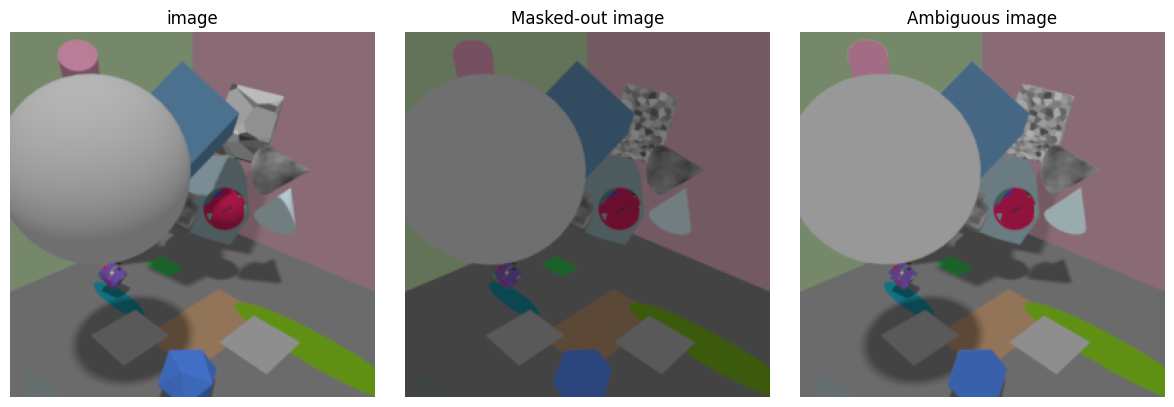

In [36]:
# create shading condition 2
# make it so that the average luminance is the same

imgpath = join(path2outs, "%s/img_0.4_0.4_1.5.exr"%directory)
img = cv2.imread(imgpath, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

imgpath0 = join(path2outs, "%s/img_0.4_0.4_0.0.exr"%directory)
img_0 = cv2.imread(imgpath0, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
img_0 = cv2.cvtColor(img_0, cv2.COLOR_BGR2RGB)
# masks of all different objects
#mask_allobj = load_mask(path2outs + 'masks_nov2_patterns/allobjects_ref.exr')

mask_allobj3D = cv2.imread(path2outs + 'masks_floorpattern/allobj_ref.exr', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
mask_allobj3D = cv2.cvtColor(mask_allobj3D , cv2.COLOR_BGR2RGB)

# Get average luminance
meanlum0 = img_0[mask_allobj3D==1].mean()
meanlum = img[mask_allobj3D==1].mean()
coefflum = meanlum/meanlum0

img_amb_shading = img_0*(mask_allobj3D)*coefflum + img * (1-mask_allobj3D)

fig, subs = plt.subplots(1,3, sharex=True, sharey=True, figsize=(12,4))
subs[0].imshow(img**(1/2.2))
#subs[0].imshow(img)
subs[0].axis('off')
subs[0].set_title('image')
subs[1].imshow((img_0**(1/2.2)))
subs[1].axis('off')
subs[1].set_title('Masked-out image')
#subs[2].imshow(img_illuminance**(1/2.2))
subs[2].imshow(img_amb_shading**(1/2.2))
subs[2].set_title('Ambiguous image')
subs[2].axis('off')
fig.tight_layout()
fig.savefig('figures/smooth_physically_inconsistent_allobj.png')
plt.show()

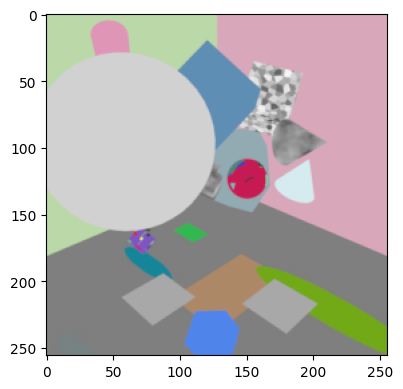

In [37]:
fig, subs = plt.subplots(1,1, sharex=True, sharey=True, figsize=(12,4))
subs.imshow(albedo**(1/2.2))
fig.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


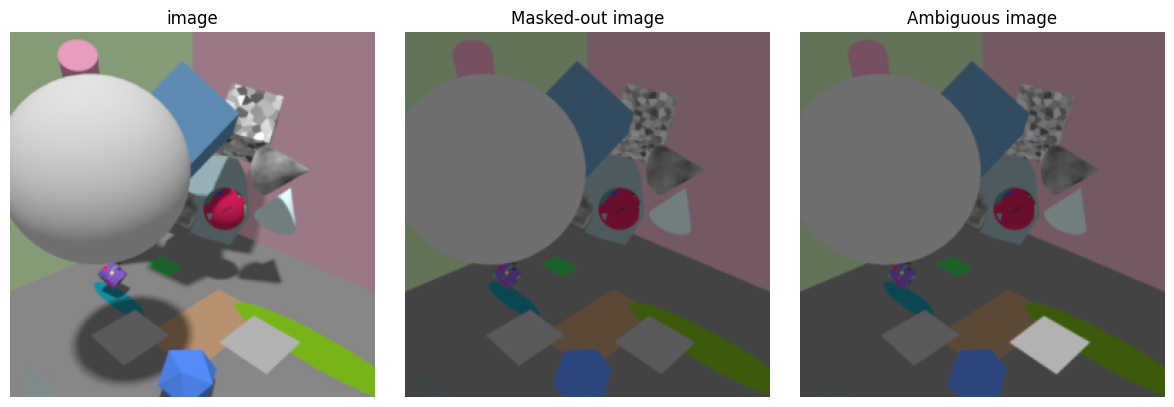

In [38]:
# create no cues condition

#mask_rightsheet[mask_rightsheet<1] = 0
#mask_rightsheet3D = np.stack((mask_rightsheet, mask_rightsheet, mask_rightsheet), -1)
mask_rightsheet3D = cv2.imread(path2outs + 'masks_floorpattern/rightsheet_ref.exr', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
mask_rightsheet3D = cv2.cvtColor(mask_rightsheet3D , cv2.COLOR_BGR2RGB)

cv2.imwrite(path2outs + 'masks_floorpattern/negativemask_rightsheet.exr', 1 - mask_rightsheet3D)

imgpath0 = join(path2outs, "%s/img_0.4_0.4_0.0.exr"%directory)
img_0 = cv2.imread(imgpath0, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
img_0 = cv2.cvtColor(img_0, cv2.COLOR_BGR2RGB)

imgpath = join(path2outs, "%s/img_0.4_0.4_3.0.exr"%directory)
img = cv2.imread(imgpath, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_amb_whole = img*(mask_rightsheet3D) + img_0 * (1-mask_rightsheet3D)


fig, subs = plt.subplots(1,3, sharex=True, sharey=True, figsize=(12,4))
subs[0].imshow(img**(1/2.2))
#subs[0].imshow(img)
subs[0].axis('off')
subs[0].set_title('image')
subs[1].imshow((img_0**(1/2.2)))
subs[1].axis('off')
subs[1].set_title('Masked-out image')
#subs[2].imshow(img_illuminance**(1/2.2))
subs[2].imshow(img_amb_whole**(1/2.2))
subs[2].set_title('Ambiguous image')
subs[2].axis('off')
fig.tight_layout()
fig.savefig('figures/smooth_physically_inconsistent_whole.png')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


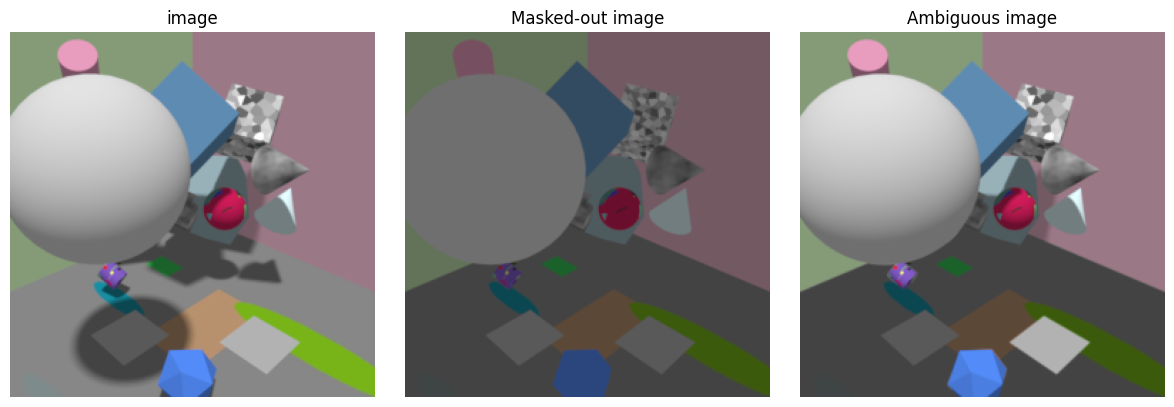

In [39]:
# create floor condition

# masks of floor
#mask_floor = load_mask(path2outs + 'masks_floorpattern/floor_ref.exr')
#mask_floor3D = np.stack((mask_floor, mask_floor, mask_floor), -1)

mask_floor3D = cv2.imread(path2outs + 'masks_floorpattern/floor_ref.exr', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
mask_floor3D = cv2.cvtColor(mask_floor3D , cv2.COLOR_BGR2RGB)

img_amb_shadows = img_0*(mask_floor3D) + img * (1-mask_floor3D)

fig, subs = plt.subplots(1,3, sharex=True, sharey=True, figsize=(12,4))
subs[0].imshow(img**(1/2.2))
#subs[0].imshow(img)
subs[0].axis('off')
subs[0].set_title('image')
subs[1].imshow((img_0**(1/2.2)))
subs[1].axis('off')
subs[1].set_title('Masked-out image')
#subs[2].imshow(img_illuminance**(1/2.2))
subs[2].imshow(img_amb_shadows**(1/2.2))
subs[2].set_title('Ambiguous image')
subs[2].axis('off')
fig.tight_layout()
#fig.savefig('figures/smooth_physically_inconsistent_whole_cube.png')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


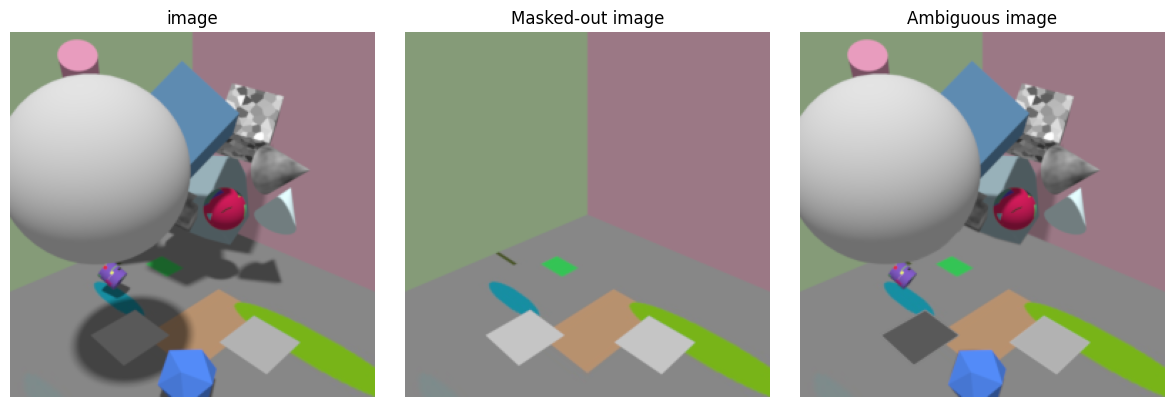

In [40]:
# create floor condition 2nd version
emptydir = "emptyfloor_eevee3p6"
imgpathempty = join(path2outs, "%s/img_3.0.exr"%emptydir)
img_empty = cv2.imread(imgpathempty, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
img_empty = cv2.cvtColor(img_empty, cv2.COLOR_BGR2RGB)

# masks of floor
img_amb_shadows = img_empty*(mask_floor3D) + img * (1-mask_floor3D)

fig, subs = plt.subplots(1,3, sharex=True, sharey=True, figsize=(12,4))
subs[0].imshow(img**(1/2.2))
#subs[0].imshow(img)
subs[0].axis('off')
subs[0].set_title('image')
subs[1].imshow((img_empty**(1/2.2)))
subs[1].axis('off')
subs[1].set_title('Masked-out image')
#subs[2].imshow(img_illuminance**(1/2.2))
subs[2].imshow(img_amb_shadows**(1/2.2))
subs[2].set_title('Ambiguous image')
subs[2].axis('off')
fig.tight_layout()
fig.savefig('figures/smooth_physically_inconsistent_floor_bright.png')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


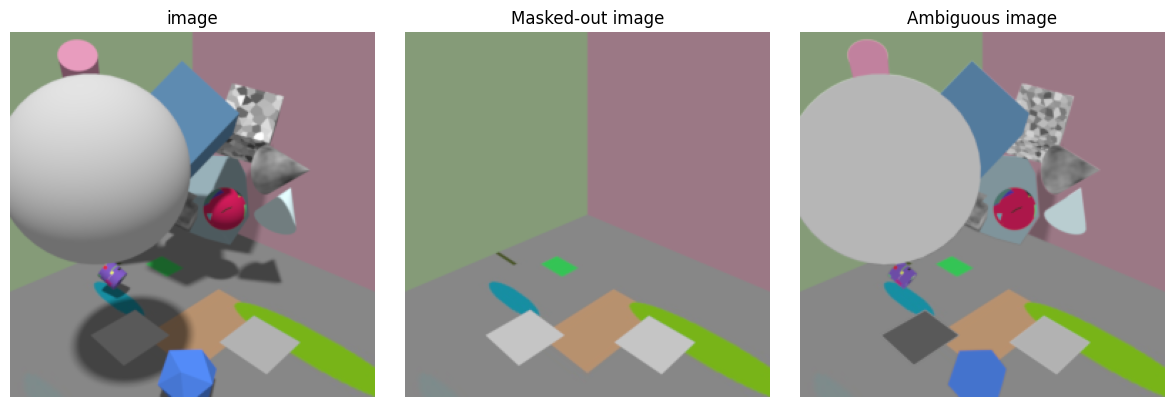

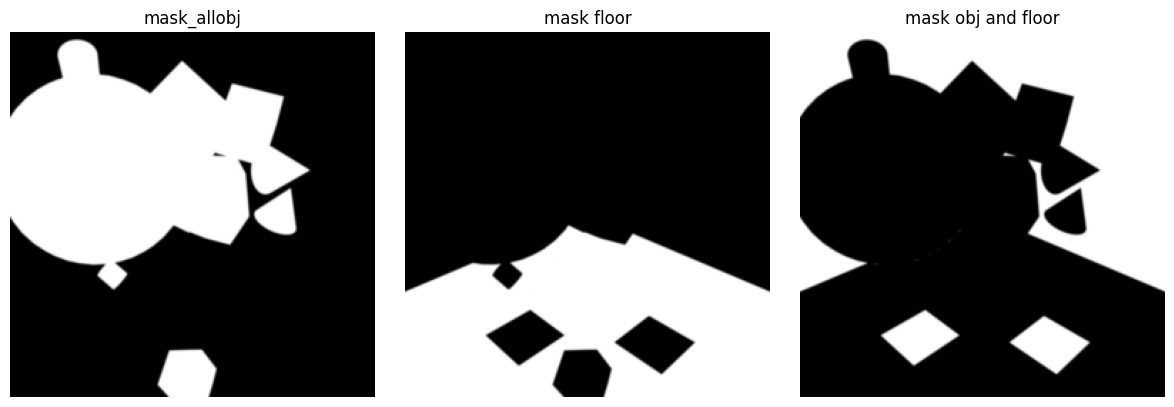

In [42]:
# create objects and floor condition

# masks of walls

mask_objfloor3D = mask_floor3D + mask_allobj3D
mask_objfloor3D[mask_objfloor3D>1] = 1

mask_allobj3D = cv2.imread(path2outs + 'masks_floorpattern/allobj_ref.exr', cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
mask_allobj3D = cv2.cvtColor(mask_allobj3D , cv2.COLOR_BGR2RGB)

# Get average luminance
meanlum0 = img_0[mask_allobj3D==1].mean()
meanlum = img[mask_allobj3D==1].mean()
coefflum = meanlum/meanlum0

img_amb_objfloor = img_0*(mask_allobj3D)*coefflum + img_empty*(mask_floor3D) + img * (1-mask_objfloor3D)

fig, subs = plt.subplots(1,3, sharex=True, sharey=True, figsize=(12,4))
subs[0].imshow(img**(1/2.2))
#subs[0].imshow(img)
subs[0].axis('off')
subs[0].set_title('image')
subs[1].imshow((img_empty**(1/2.2)))
subs[1].axis('off')
subs[1].set_title('Masked-out image')
#subs[2].imshow(img_illuminance**(1/2.2))
subs[2].imshow(img_amb_objfloor**(1/2.2))
subs[2].set_title('Ambiguous image')
subs[2].axis('off')
fig.tight_layout()
#fig.savefig('figures/smooth_physically_inconsistent_whole_cube.png')
plt.show()

fig, subs = plt.subplots(1,3, sharex=True, sharey=True, figsize=(12,4))
subs[0].imshow(mask_allobj3D)
#subs[0].imshow(img)
subs[0].axis('off')
subs[0].set_title('mask_allobj')
subs[1].imshow(mask_floor3D)
subs[1].axis('off')
subs[1].set_title('mask floor')
#subs[2].imshow(img_illuminance**(1/2.2))
subs[2].imshow((1-mask_objfloor3D))
subs[2].set_title('mask obj and floor')
subs[2].axis('off')
fig.tight_layout()
#fig.savefig('figures/smooth_physically_inconsistent_whole_cube.png')
plt.show()

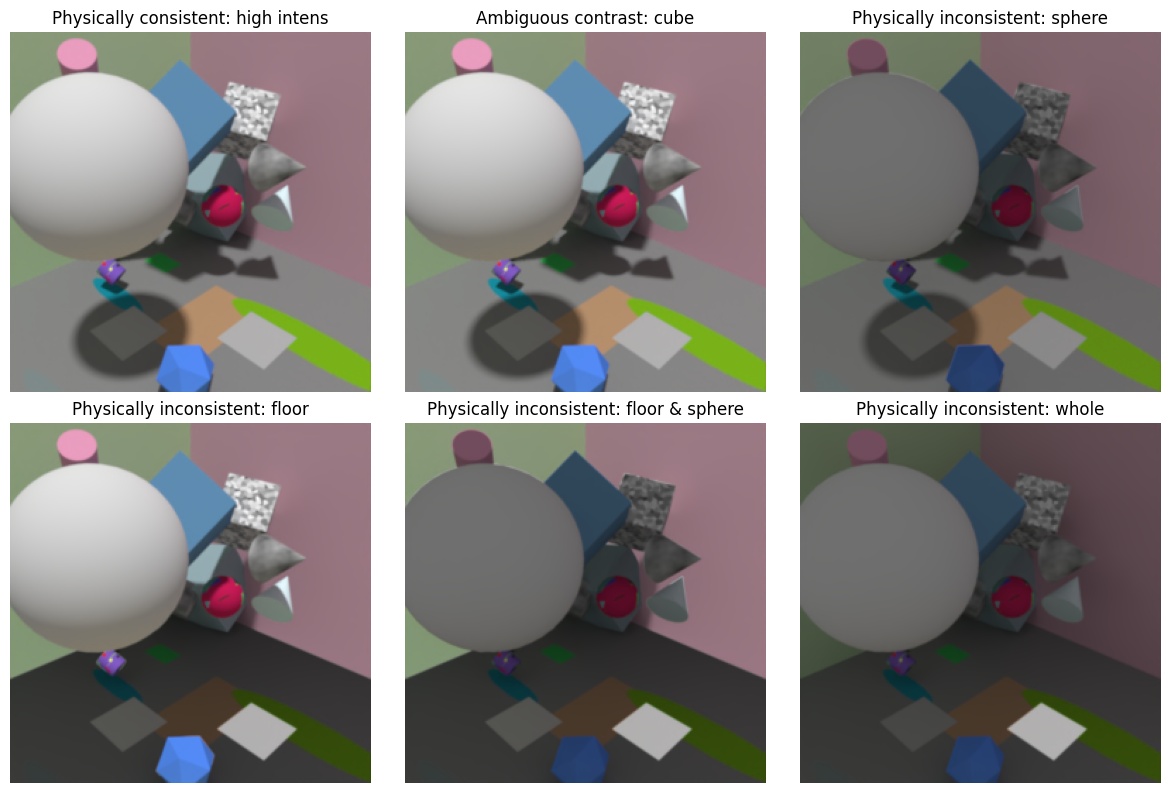

In [13]:

#imgpath_cube = join(path2outs, "images_%i_patterns/img_0.4_0.4_3.0_cube.exr"%samples)
#img_wrong_table = cv2.imread(imgpath_cube, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
#img_wrong_table = cv2.cvtColor(img_wrong_table, cv2.COLOR_BGR2RGB)

img_wrong_table = img.copy()

fig, subs = plt.subplots(2,3, sharex=True, sharey=True, figsize=(12,8))
subs[0, 0].imshow(img**(1/2.2))
#subs[0].imshow(img)
subs[0, 0].axis('off')
subs[0, 0].set_title('Physically consistent: high intens')
subs[0, 1].imshow(img_wrong_table**(1/2.2))
subs[0, 1].axis('off')
subs[0, 1].set_title('Ambiguous contrast: cube')
#subs[2].imshow(img_illuminance**(1/2.2))
subs[1, 0].set_title('Physically inconsistent: floor')
subs[1, 0].axis('off')
subs[1, 0].imshow(img_amb_shadows**(1/2.2))
subs[0, 2].set_title('Physically inconsistent: sphere')
subs[0, 2].axis('off')
subs[0, 2].imshow(img_amb_shading**(1/2.2))
subs[1, 1].set_title('Physically inconsistent: floor & sphere')
subs[1, 1].axis('off')
subs[1, 1].imshow(img_amb_objfloor**(1/2.2))
subs[1, 2].set_title('Physically inconsistent: whole')
subs[1, 2].axis('off')
subs[1, 2].imshow(img_amb_whole**(1/2.2))
fig.tight_layout()
fig.savefig('figure_test_conditions_cube.png')
plt.show()

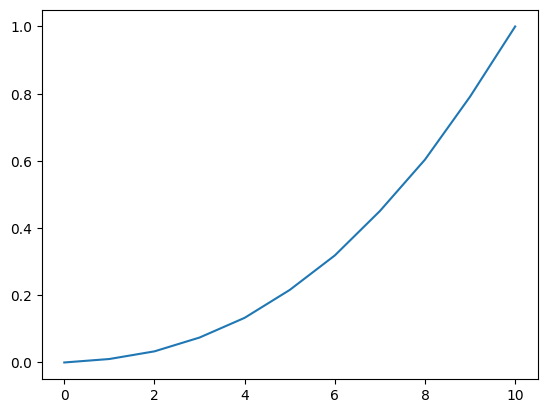

In [11]:
testimgpath = '/home/alban/Documents/blender_testset/testset/tests/img_test%i_ref.exr'

pasted_reflectances = list()
for i in range(11):
    testimg = cv2.imread(testimgpath%i, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    testimg = cv2.cvtColor(testimg , cv2.COLOR_BGR2RGB)
    reflectance = testimg[mask_rightsheet==1]
    pasted_reflectances.append(reflectance.mean())

plt.plot(range(11), np.array(pasted_reflectances))

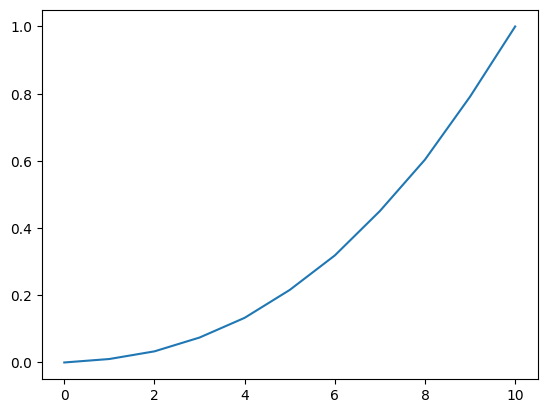

In [12]:
testimgpath = '/home/alban/Documents/blender_testset/testset/tests/img_patterntest%i_ref.exr'

pasted_reflectances = list()
for i in range(11):
    testimg = cv2.imread(testimgpath%i, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
    testimg = cv2.cvtColor(testimg , cv2.COLOR_BGR2RGB)
    reflectance = testimg[mask_rightsheet==1]
    pasted_reflectances.append(reflectance.mean())

plt.plot(range(11), np.array(pasted_reflectances))